TODO : 
 - how to make UV attributes like std, skew, accessible ? using q.value.skew ? 
 - multiplication precedence : `x = mcerp.Normal(1, 2)*s` doesn't work because mcerp can't cast quantity object to UV

# mcerp
See :
 - github : https://github.com/tisimst/mcerp
 - online doc : https://pythonhosted.org/mcerp/

# Introduction on mcerp

UV : uncertain Variable

liste of distributions : https://pythonhosted.org/mcerp/distribution_constructors.html

In [1]:
import mcerp
mcerp.npts = 12_000

In [2]:
x = mcerp.Normal(1, 3, tag="toto")
y = mcerp.Normal(2, 5)
print(x)
print(y)
print(x.mean)
print(x.var)
print(x.kurt)
print(x.skew)
print(mcerp.npts)
print(x.tag)

uv(1.0000724662113922, 9.000851508040034, 0.0008574045106275768, 3.0029617630104806)
uv(2.0000637210909034, 24.99815396862448, 0.00047128678991744045, 2.998021369943102)
1.0000724662113922
9.000851508040034
3.0029617630104806
0.0008574045106275768
12000
toto


MCERP Uncertain Value (toto):
 > Mean...................  1.0000724662113922
 > Variance...............  9.000851508040034
 > Skewness Coefficient...  0.0008574045106275768
 > Kurtosis Coefficient...  3.0029617630104806

MCERP Uncertain Value:
 > Mean...................  2.0000637210909034
 > Variance...............  24.99815396862448
 > Skewness Coefficient...  0.00047128678991744045
 > Kurtosis Coefficient...  2.998021369943102

toto


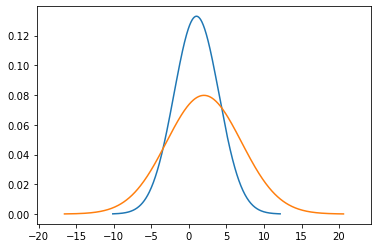

In [3]:
x.describe()
y.describe()
x.plot()
y.plot()
print(x.tag)

In [4]:
z = x + y

MCERP Uncertain Value:
 > Mean...................  3.0001361873022954
 > Variance...............  33.54691223791343
 > Skewness Coefficient... -0.051750104192036114
 > Kurtosis Coefficient...  2.9507620082304116



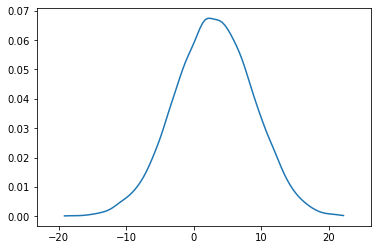

In [5]:
z.describe()
z.plot()

# Support with physipy

In [30]:
import physipy 
from physipy import m, cd, s, Quantity, Dimension

## Construction

In [31]:
x = Quantity(mcerp.Normal(1, 2), Dimension("L"))
x

<Quantity : uv(0.9998445660019506, 4.001698512947923, -0.003712420317949487, 3.0131352584388877) m>

In [32]:
# using multiplication
# x = mcerp.Normal(1, 2)*s : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty
x = s *mcerp.Normal(1, 2)
x

<Quantity : uv(0.9999266988104079, 3.9991531304872696, -0.0014373721916087917, 2.9944020939404177) s, symbol=UndefinedSymbol*s>

## Basic Operation

In [20]:
# with scalar
s = 2*m
print(x+s)
print(x-s)
print(x*s)
print(x/s)
# print(x**s) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

print(s+x)
print(s-x)
print(s*x)
print(s/x)
# print(x**s) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty


uv(3.0000521176883486, 3.999432071948219, 0.0009887653796142668, 2.9959460380566845) m
uv(-0.9999478823116518, 3.999432071948219, 0.0009887653796148818, 2.9959460380566845) m
uv(2.0001042353766962, 15.997728287792876, 0.0009887653796149024, 2.9959460380566845) m**2
uv(0.5000260588441741, 0.9998580179870548, 0.0009887653796149024, 2.9959460380566845)
uv(3.0000521176883486, 3.999432071948219, 0.0009887653796142668, 2.9959460380566845) m
uv(0.9999478823116518, 3.999432071948219, -0.0009887653796148818, 2.9959460380566845) m
uv(2.0001042353766962, 15.997728287792876, 0.0009887653796149024, 2.9959460380566845) m**2
uv(1.398006948963993, 37444.39452211525, 61.43571584317208, 6972.961378840763)


In [25]:
# with other uv
x = Quantity(mcerp.Normal(1, 2), Dimension("L"))
y = Quantity(mcerp.Normal(1, 2), Dimension("L"))

print(x+y)
print(x-y)
print(x*y)
print(x/y)
# print(x**y) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

print(y+x)
print(y-x)
print(y*x)
print(y/x)
# print(y**x) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

uv(1.9998194729311387, 8.076306197292078, 0.0005523833482633396, 3.0800987793853376) m
uv(3.264955504208918e-05, 7.92528720301836, -0.005229009357082663, 3.0180913861698) m
uv(1.0375742293805756, 24.626620937405843, 0.8875461893383568, 8.610304004536113) m**2
uv(1.714470707297022, 15254.726786153124, 35.99321215602319, 3042.5319198285174)
uv(1.9998194729311387, 8.076306197292078, 0.0005523833482633396, 3.0800987793853376) m
uv(-3.264955504208918e-05, 7.92528720301836, 0.005229009357082663, 3.0180913861698) m
uv(1.0375742293805756, 24.626620937405843, 0.8875461893383568, 8.610304004536113) m**2
uv(-10.298305897771893, 1327198.8651144467, -108.74445949787064, 11883.716327161823)


# Functionnalities
Use `q.value.` to acces mcerp attributes

In [38]:
x.value.describe()
x.value.skew
print(x.value.stats)

MCERP Uncertain Value:
 > Mean...................  0.9999266988104079
 > Variance...............  3.9991531304872696
 > Skewness Coefficient... -0.0014373721916087917
 > Kurtosis Coefficient...  2.9944020939404177

[0.9999266988104079, 3.9991531304872696, -0.0014373721916087917, 2.9944020939404177]


# Examples

In [118]:
from mcerp import N, U, Gamma, Beta, Exp, H

In [44]:
x1 = m * N(24, 1)
x2 = m * N(37, 4)
x3 = s * Exp(2)

In [61]:
# x1.mean
print("x1.mean")
print(x1.mean) # falls back on UV value, hence drops the unit
# x1.mean() : fails because relies on numpy.mean

# x1.var
print("x1.var")
print(x1.var) # falls back on UV value, hence drops the nit

# x1.skew
print("x1.skew")
print(x1.skew) # falls back on UV value, hence drops the nit

# x1.kurt
print("x1.kurt")
print(x1.kurt)

# x1.stats
print("x1.stats")
print(x1.stats)

# Z = (x1*x2**2)/(15*(1.5 + x3))
Z = (x1*x2**2)/(15*(1.5*s + x3))
print(Z)

# Z.describe()
Z.describe()

x1.mean
<bound method Quantity.mean of <Quantity : uv(23.999975288883657, 0.9998984642028829, -0.0010968371368921842, 2.996748827861545) m, symbol=UndefinedSymbol*m>>
x1.var
0.9998984642028829
x1.skew
-0.0010968371368921842
x1.kurt
2.996748827861545
x1.stats
[23.999975288883657, 0.9998984642028829, -0.0010968371368921842, 2.996748827861545]
uv(1161.2895629578375, 116037.17275628561, 0.333666658312887, 2.9871627071422533) m**3/s
MCERP Uncertain Value:
 > Mean...................  1161.2895629578375
 > Variance...............  116037.17275628561
 > Skewness Coefficient...  0.333666658312887
 > Kurtosis Coefficient...  2.9871627071422533



# Distributions

In [66]:
mu = 1
sigma = 0.1
x = s * mcerp.Normal(mu, sigma)

In [69]:
# y = mcerp.Normal(mu*s, sigma*s) # fails because "assert sigma > 0, "

In [77]:
import scipy.stats as ss
x = s * mcerp.uv(ss.norm(loc=10, scale=1))
x

<Quantity : uv(9.999986711100773, 1.0000725717511239, -0.0006300311665686028, 3.001396405032263) s, symbol=UndefinedSymbol*s>

In [92]:
distrib = ss.norm(loc=10*s, scale=1*s)
distrib.mean() # unit is stripped, not mcerp's fault

10.0

In [94]:
y = mcerp.uv(distrib)
y

uv(9.999986155857247, 0.999899659705177, -0.0006583045925119476, 2.9978998277806537)

# Plotting

In [96]:
# x1.plot() : fails because uses Quantity.plot, which doesn't handle mcerp

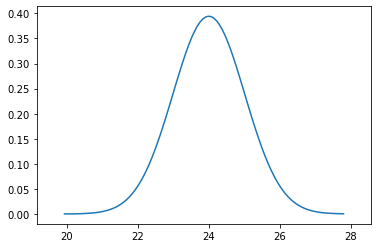

In [97]:
x1.value.plot()

AttributeError: 'Polygon' object has no property 'normed'

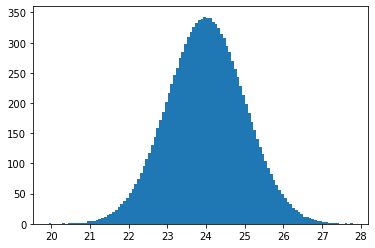

In [99]:
# fails because of matploltib version on normed 
x1.value.plot(hist=True)

In [100]:
rvs1 = m*N(5, 10)
rvs2 = m*N(5, 10) + m*N(0, 0.2)
rvs3 = m*N(8, 10) + m*N(0, 0.2)

In [103]:
from scipy.stats import ttest_rel
tstat, pval = ttest_rel(rvs1._mcpts, rvs2._mcpts)
pval

0.9988304233934668

In [104]:
rvs1<rvs2

False

In [106]:
tstat, pval = ttest_rel(rvs1._mcpts, rvs3._mcpts)
pval

3.036469912768895e-116

In [107]:
float(tstat)

-23.172141676136075

In [108]:
rvs1<rvs3

True

In [109]:
x = N(0, 1)
y = N(0, 10)
x<y

False

In [110]:
x>y

False

In [111]:
x==y

False

In [112]:
x1==x1

True

In [113]:
n1 = s*N(0, 1)
n2 = s*N(0, 1)
n1==n2

False

In [116]:
print(Z*Z)
print(Z**2)
Z*Z == Z**2

uv(1464630.6217910906, 713968805517.8673, 1.1511482207800294, 4.9552348441246545) m**6/s**2
uv(1464630.6217910906, 713968805517.8673, 1.1511482207800294, 4.9552348441246545) m**6/s**2


False

In [120]:
h = s*H(50, 5, 10)
h==4

False

In [122]:
h<=3*s

TypeError: unsupported operand type(s) for |: 'float' and 'float'

In [126]:
n = s*N(0, 1)
n==0*s

0.0

In [127]:
n==0.5*s

0.0

In [128]:
n==1.2345*s

0.0